In [77]:
import torch
import torchvision
import random
import torchvision.transforms as tf 

from tqdm import tqdm
from model import ConvNet

In [105]:
batch_size = 128

class RandomPadRange:
    def __init__(self, min_padding=0, max_padding=10, fill=0, padding_mode='constant'):
        self.max_padding = max_padding
        self.min_padding = min_padding
        self.fill = fill
        self.padding_mode = padding_mode
        
    def __call__(self, img):
        padding = [random.randint(self.min_padding, self.max_padding) for i in range(4)]
        pad_transform = tf.Pad(padding=padding, fill=self.fill, padding_mode=self.padding_mode)
        
        return pad_transform(img)
      
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/home/bach/Bach/Swinburne/lab/data', train=True, download=True,
                             transform=tf.Compose([
                               tf.ToTensor(),
                               RandomPadRange(),
                               tf.RandomResizedCrop((28,28), scale=(1,1), ratio=(1,1)),
                               tf.Normalize((0.1307,), (0.3081,)),
                              #  tf.RandomCrop((28,28), padding=4),
                               tf.RandomRotation(20),
                             ])),
  batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/home/bach/Bach/Swinburne/lab/data', train=False, download=True,
                             transform=tf.Compose([
                               tf.ToTensor(),
                               RandomPadRange(),
                               tf.RandomResizedCrop((28,28), scale=(1,1), ratio=(1,1)),
                               tf.Normalize((0.1307,), (0.3081,)),
                              #  tf.RandomCrop((28,28), padding=4),
                               tf.RandomRotation(20),
                             ])),
  batch_size=batch_size, shuffle=True)

In [109]:
img, label = next(iter(train_loader))

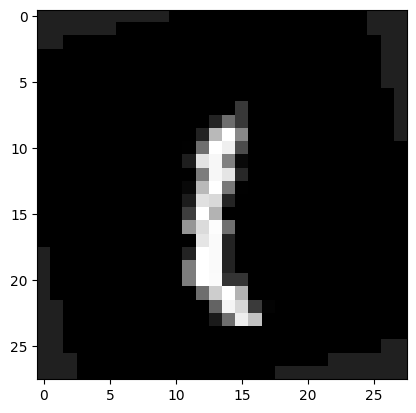

In [110]:
import matplotlib.pyplot as plt
plt.imshow(img[2][0].numpy(), cmap='gray')

In [111]:
net = ConvNet()
optimizer = torch.optim.Adam(net.parameters(), lr = 1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [112]:
def training_loop(n_epochs, optimizer, loss_fn, net, train_loader, val_loader):
    for epoch in range(1, n_epochs+1):
        net.train()
        loss_train = 0.0
        for imgs, labels in tqdm(train_loader):
            out = net(imgs)
            loss = loss_fn(out, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
            
        if True:
            print(f"Epoch {epoch}, Training loss {loss_train/len(train_loader)}") 
            
            # Validate
            loss_val = 0.0
            correct = 0 
            total = 0
            
            net.eval()
            with torch.no_grad():
                for imgs, labels in tqdm(val_loader)  :
                    outputs = net(imgs)
                    loss = loss_fn(outputs, labels)
                    loss_val += loss.item()
                    
                    _, predicted = torch.max(outputs, dim=1) 
                    correct += int((predicted == labels).sum())  
                    total += labels.shape[0]
                    
                print(f"Epoch {epoch}, Validation loss {loss_val/len(val_loader)}") 
                print(f"Epoch {epoch}, Accuracy {correct/total}") 
                
                
                    

In [113]:
training_loop(30, optimizer, loss_fn, net, train_loader, val_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

100%|██████████| 469/469 [01:21<00:00,  5.78it/s]


Epoch 1, Training loss 0.6242935930424408


100%|██████████| 79/79 [00:10<00:00,  7.81it/s]


Epoch 1, Validation loss 0.22002048488659195
Epoch 1, Accuracy 0.938


100%|██████████| 469/469 [01:15<00:00,  6.18it/s]


Epoch 2, Training loss 0.1874300991214796


100%|██████████| 79/79 [00:10<00:00,  7.83it/s]


Epoch 2, Validation loss 0.13584560514250887
Epoch 2, Accuracy 0.9612


100%|██████████| 469/469 [01:13<00:00,  6.40it/s]


Epoch 3, Training loss 0.13094658321980981


100%|██████████| 79/79 [00:10<00:00,  7.70it/s]


Epoch 3, Validation loss 0.11151526788178878
Epoch 3, Accuracy 0.9675


100%|██████████| 469/469 [01:14<00:00,  6.32it/s]


Epoch 4, Training loss 0.10707269279337896


100%|██████████| 79/79 [00:10<00:00,  7.87it/s]


Epoch 4, Validation loss 0.09004395854765479
Epoch 4, Accuracy 0.9725


100%|██████████| 469/469 [01:37<00:00,  4.83it/s]


Epoch 5, Training loss 0.09025157629045596


100%|██████████| 79/79 [00:11<00:00,  6.61it/s]


Epoch 5, Validation loss 0.07092609171625934
Epoch 5, Accuracy 0.9782


100%|██████████| 469/469 [01:34<00:00,  4.98it/s]


Epoch 6, Training loss 0.08232045048144834


100%|██████████| 79/79 [00:14<00:00,  5.35it/s]


Epoch 6, Validation loss 0.0745900556963833
Epoch 6, Accuracy 0.9741


100%|██████████| 469/469 [01:17<00:00,  6.09it/s]


Epoch 7, Training loss 0.07478489459895377


100%|██████████| 79/79 [00:10<00:00,  7.75it/s]


Epoch 7, Validation loss 0.061978258145383644
Epoch 7, Accuracy 0.9815


100%|██████████| 469/469 [01:37<00:00,  4.79it/s]


Epoch 8, Training loss 0.06833804992319488


100%|██████████| 79/79 [00:12<00:00,  6.27it/s]


Epoch 8, Validation loss 0.0565683274011163
Epoch 8, Accuracy 0.9828


100%|██████████| 469/469 [01:39<00:00,  4.72it/s]


Epoch 9, Training loss 0.06518049708911097


100%|██████████| 79/79 [00:13<00:00,  5.76it/s]


Epoch 9, Validation loss 0.06672348294265662
Epoch 9, Accuracy 0.9796


100%|██████████| 469/469 [01:45<00:00,  4.47it/s]


Epoch 10, Training loss 0.06206221445235235


100%|██████████| 79/79 [00:11<00:00,  6.64it/s]


Epoch 10, Validation loss 0.055885976003600825
Epoch 10, Accuracy 0.9805


  4%|▎         | 17/469 [00:03<01:33,  4.86it/s]


KeyboardInterrupt: 

In [92]:
torch.save(net.state_dict(), "weight.pt")

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0
    0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0   0   0 255 25

tensor([[ 4.2695, -8.3979, -0.9804, -0.0246, -5.5744,  0.1513, -2.1535, -6.2336,
          3.9225, -4.1123]], grad_fn=<AddmmBackward0>)

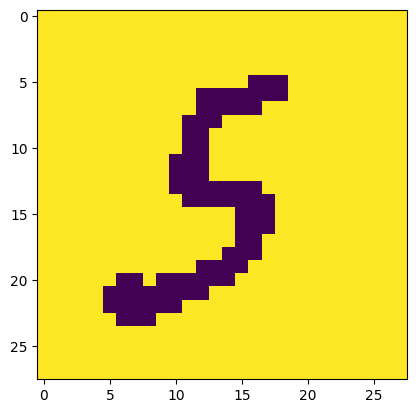

In [113]:
import cv2
import numpy as np 
import torchvision.transforms as tf

transform = tf.Compose([tf.ToTensor(),
                        tf.Normalize((0.1307,), (0.3081,))
])

net = ConvNet()
net.load_state_dict(torch.load("weight.pt"))

img_path = "data/5.1.png"
img = cv2.imread(img_path, 0)
inp = cv2.resize(img, dsize=[28,28])
    
# Preprocess
binary = cv2.threshold(inp, 130, 255, cv2.THRESH_BINARY)[1]

binary = (np.asarray(binary))
print(binary)

plt.imshow(arr)

# plt.imshow(transform(arr)[0], cmap='gray')
# arr = np.expand_dims(arr, axis=0)
# arr = np.expand_dims(arr, axis=0)
out = net(transform(arr))
out